## Analyze which European country performs the best at soccer?

In [124]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [125]:
df.corr()

,home_score,away_score,neutral
home_score,1.000000,-0.136000,-0.032099
away_score,-0.136000,1.000000,0.084906
neutral,-0.032099,0.084906,1.000000


In [126]:
def winner(row):
    if row['home_score'] > row['away_score']: return row['home_team'] 
    elif row['home_score'] < row['away_score']: return row['away_team']
    else: return 'DRAW'
    
df['winner'] = df.apply(lambda row: winner(row), axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,DRAW
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,DRAW
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [127]:
def loser(row):
    if row['home_score'] < row['away_score']: return row['home_team'] 
    elif row['home_score'] > row['away_score']: return row['away_team']
    else: return 'DRAW'
    
df['loser'] = df.apply(lambda row: loser(row), axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,DRAW,DRAW
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,DRAW,DRAW
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England


In [128]:
winners = pd.value_counts(df.winner)
winners = winners.drop('DRAW')
winners.head(20)

Brazil         625
England        573
Germany        555
Argentina      526
Sweden         500
South Korea    454
Mexico         439
Hungary        435
Italy          424
France         419
Spain          407
Netherlands    399
Uruguay        382
Scotland       372
Russia         358
Denmark        356
Poland         352
Belgium        335
Zambia         328
Austria        324
Name: winner, dtype: int64

In [121]:
goals = pd.Series(index=winners.index, dtype='int32')
for col in goals.index:
    goals[col] = df[df.home_team == col].home_score.sum() + df[df.away_team == col].away_score.sum()
goals = goals.fillna(0).sort_values(ascending=False)
goals.head(20)

England        2209
Brazil         2149
Germany        2126
Sweden         2015
Hungary        1889
Argentina      1830
Netherlands    1619
Mexico         1514
South Korea    1512
France         1498
Denmark        1416
Spain          1405
Uruguay        1391
Austria        1386
Poland         1373
Italy          1371
Belgium        1363
Scotland       1355
Norway         1215
Russia         1205
dtype: int32

In [129]:
stats = pd.DataFrame(columns=winners.index, index=['wins', 'draws', 'loses'], dtype='float64')
for col in goals.index:
    stats[col]['wins'] = len(df[df.winner == col])
    stats[col]['draws'] = len(df[df.home_team == col]) + len(df[df.away_team == col]) - (len(df[df.winner == col]) + len(df[df.loser == col]))
    stats[col]['loses'] = len(df[df.loser == col])
stats.head()

,Brazil,England,Germany,Argentina,Sweden,South Korea,Mexico,Hungary,Italy,France,...,Two Sicilies,Saarland,Kabylia,Asturias,Republic of St. Pauli,Surrey,Gozo,Central Spain,Micronesia,Timor-Leste
wins,625.0,573.0,555.0,526.0,500.0,454.0,439.0,435.0,424.0,419.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
draws,199.0,243.0,196.0,243.0,225.0,222.0,200.0,202.0,225.0,178.0,...,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
loses,157.0,195.0,200.0,211.0,295.0,186.0,230.0,293.0,153.0,245.0,...,3.0,6.0,3.0,0.0,2.0,0.0,5.0,1.0,6.0,7.0


In [123]:
df['tournament'].value_counts()

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
Dragon Cup                                  4
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Copa América qualification                  2
Name: tournament, Length: 112, dtype: int64

Text(0.5, 0.98, 'Most games per tournament')

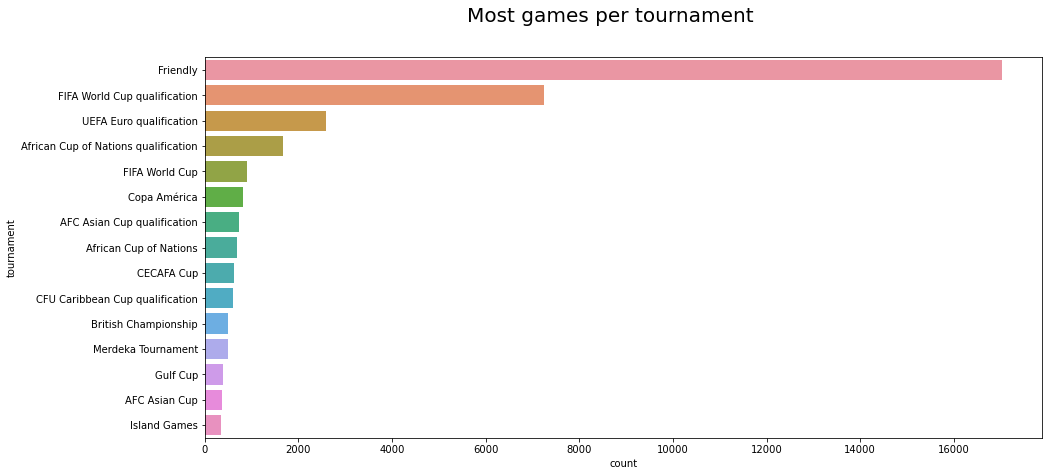

In [98]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(y = df["tournament"],order=df["tournament"].value_counts().index[:15])
fig.suptitle("Most games per tournament", fontsize=20)

In [99]:
df['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [71]:
veri=df[df['tournament']=='FIFA World Cup']
veri.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,Belgium
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France,Mexico
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia,Brazil
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania,Peru
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,France


In [72]:
winners = pd.value_counts(veri.winner)
winners = winners.drop('DRAW')
winners.head(20)

Brazil         73
Germany        67
Italy          45
Argentina      43
France         34
Spain          30
England        29
Netherlands    27
Uruguay        24
Belgium        20
Sweden         19
Russia         19
Mexico         16
Poland         16
Hungary        15
Portugal       14
Yugoslavia     14
Switzerland    12
Austria        12
Chile          11
Name: winner, dtype: int64

In [130]:
euro_teams=df[df['tournament'].isin(['FIFA World Cup', 'UEFA Euro', 'FIFA World Cup qualification', 'UEFA Euro qualification', 'UEFA Nations League'])]
euro_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,Belgium
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France,Mexico
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia,Brazil
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania,Peru
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,France


In [131]:
winners = pd.value_counts(euro_teams.winner)
winners = winners.drop('DRAW')
winners.head(20)

Germany        243
Spain          222
Italy          211
Netherlands    207
England        191
Russia         189
France         189
Portugal       180
Belgium        168
Sweden         167
Romania        143
Brazil         138
Hungary        134
Denmark        133
Poland         130
Scotland       129
Austria        125
Switzerland    124
Greece         121
Mexico         119
Name: winner, dtype: int64

In [132]:
all_teams = df['loser'].unique()
enemys_df = pd.DataFrame('', index = all_teams[1:], columns = ['Worst Record Against'])
for country in all_teams[1:]: 
    enemys_df.loc[country]['Worst Record Against'] = df[df['loser'] == country]['winner'].value_counts().index[0]
enemys_df['Worst Record Against']

Scotland                         England
England                         Scotland
Wales                            England
Northern Ireland                 England
United States                     Mexico
                             ...        
Myanmar                        Indonesia
Yorkshire             Parishes of Jersey
Parishes of Jersey             Yorkshire
Chameria                        Abkhazia
Saint Helena                    Ynys Môn
Name: Worst Record Against, Length: 310, dtype: object

In [113]:
enemys_df.loc[winners.index].head(15)

,Worst Record Against
Germany,Italy
Spain,England
Italy,Austria
Netherlands,Belgium
England,Scotland
Russia,Germany
France,Belgium
Portugal,Italy
Belgium,Netherlands
Sweden,Denmark
